In [1]:
!apt-get update -qq && apt-get install -qq libfluidsynth1 fluid-soundfont-gm build-essential libasound2-dev libjack-dev
!pip install -qU pyfluidsynth pretty_midi
!pip install music21
!pip install pypianoroll
!pip install mido

Selecting previously unselected package fluid-soundfont-gm.
(Reading database ... 155676 files and directories currently installed.)
Preparing to unpack .../fluid-soundfont-gm_3.1-5.1_all.deb ...
Unpacking fluid-soundfont-gm (3.1-5.1) ...
Selecting previously unselected package libfluidsynth1:amd64.
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up fluid-soundfont-gm (3.1-5.1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.5) ...
     |████████████████████████████████| 5.6 MB 5.3 MB/s 
     |████████████████████████████████| 51 kB 6.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from mido import MidiFile
from music21 import converter, instrument, note, chord, stream
import pypianoroll
from google.colab import drive
from IPython.display import Audio
import os
import numpy as np
import glob
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
def create_parts(mid_file):
  parts = {}

  to_normalize = {
  'Right': 'Piano Right',
  'Left': 'Piano Left',
  'Grand Piano': 'Piano',
  'Violino I': 'Violin1',
  'Violino II': 'Violin2',
  '1st Violin': 'Violin1',
  '2nd Violin': 'Violin2',
  'Solo Cello': 'Cello',
  'Violoncello': 'Cello',
  'Cello Pizz': 'Cello',
  'Six Suites for Solo Cello': 'Cello',
  'Violin 1': 'Violin1',
  'Violin 2': 'Violin2',
  'Piano RH': 'Piano Right',
  'Piano LH': 'Piano Left',
  'Piano RH (Playback)': 'Piano Right',
  'Piano LH (Playback)': 'Piano Left',
  'Violino I.': 'Violin1',
  'Viola.': 'Viola',
  'Violin 1 arco': 'Violin1',
  'Cello arco': 'Cello',
  'Cello pizz': 'Cello',
  'Violino II.': 'Violin2',
  'Violin2 Pizz': 'Violin2',
  'Violin 2 pizz': 'Violin2',
  'Violin 2 arco': 'Violin2',
  'Cello (Playback)': 'Cello',
  'Viola pizz': 'Viola',
  'Viola Arco': 'Viola',
  'Violincello': 'Cello',
  'Violoncello.': 'Cello',
  'Violin1 Sub': 'Violin1',
  'Viola arco': 'Viola',
  'Viola Pizz': 'Viola',
  'Violin1 Pizz': 'Violin1',
  'Viola Sub': 'Viola',
  'Violin Pizz': 'Violin1',
  'Violin (Playback)': 'Violin1',
  'Viola (Playback)': 'Viola',
  'Acoustic Grand Piano': 'Piano',
  'Pianoforte': 'Piano',
  'Violin': 'Violin1',
  }

  to_ignore = [
      'Instrument17', 'Instrument18', 'Instrument19', 
      '--------------------------------------', 'Johann Sebastian Bach  (1685-1750)'
  ]

  for track in mid.tracks:
    if track.name not in to_ignore:
      if track.name in to_normalize.keys():
        normalized_name = to_normalize[track.name]
        if normalized_name not in parts.keys():
          parts[normalized_name] = track.pianoroll
      else:
        parts[track.name] = track.pianoroll
    
  return parts

In [4]:
to_normalize = {
  'Right': 'Piano Right',
  'Left': 'Piano Left',
  'Grand Piano': 'Piano',
  'Violino I': 'Violin1',
  'Violino II': 'Violin2',
  '1st Violin': 'Violin1',
  '2nd Violin': 'Violin2',
  'Solo Cello': 'Cello',
  'Violoncello': 'Cello',
  'Cello Pizz': 'Cello',
  'Six Suites for Solo Cello': 'Cello',
  'Violin 1': 'Violin1',
  'Violin 2': 'Violin2',
  'Piano RH': 'Piano Right',
  'Piano LH': 'Piano Left',
  'Piano RH (Playback)': 'Piano Right',
  'Piano LH (Playback)': 'Piano Left',
  'Violino I.': 'Violin1',
  'Viola.': 'Viola',
  'Violin 1 arco': 'Violin1',
  'Cello arco': 'Cello',
  'Cello pizz': 'Cello',
  'Violino II.': 'Violin2',
  'Violin2 Pizz': 'Violin2',
  'Violin 2 pizz': 'Violin2',
  'Violin 2 arco': 'Violin2',
  'Cello (Playback)': 'Cello',
  'Viola pizz': 'Viola',
  'Viola Arco': 'Viola',
  'Violincello': 'Cello',
  'Violoncello.': 'Cello',
  'Violin1 Sub': 'Violin1',
  'Viola arco': 'Viola',
  'Viola Pizz': 'Viola',
  'Violin1 Pizz': 'Violin1',
  'Viola Sub': 'Viola',
  'Violin Pizz': 'Violin1',
  'Violin (Playback)': 'Violin1',
  'Viola (Playback)': 'Viola',
  'Acoustic Grand Piano': 'Piano',
  'Pianoforte': 'Piano',
  'Violin': 'Violin1',
  }
print(to_normalize)

{'Right': 'Piano Right', 'Left': 'Piano Left', 'Grand Piano': 'Piano', 'Violino I': 'Violin1', 'Violino II': 'Violin2', '1st Violin': 'Violin1', '2nd Violin': 'Violin2', 'Solo Cello': 'Cello', 'Violoncello': 'Cello', 'Cello Pizz': 'Cello', 'Six Suites for Solo Cello': 'Cello', 'Violin 1': 'Violin1', 'Violin 2': 'Violin2', 'Piano RH': 'Piano Right', 'Piano LH': 'Piano Left', 'Piano RH (Playback)': 'Piano Right', 'Piano LH (Playback)': 'Piano Left', 'Violino I.': 'Violin1', 'Viola.': 'Viola', 'Violin 1 arco': 'Violin1', 'Cello arco': 'Cello', 'Cello pizz': 'Cello', 'Violino II.': 'Violin2', 'Violin2 Pizz': 'Violin2', 'Violin 2 pizz': 'Violin2', 'Violin 2 arco': 'Violin2', 'Cello (Playback)': 'Cello', 'Viola pizz': 'Viola', 'Viola Arco': 'Viola', 'Violincello': 'Cello', 'Violoncello.': 'Cello', 'Violin1 Sub': 'Violin1', 'Viola arco': 'Viola', 'Viola Pizz': 'Viola', 'Violin1 Pizz': 'Violin1', 'Viola Sub': 'Viola', 'Violin Pizz': 'Violin1', 'Violin (Playback)': 'Violin1', 'Viola (Playback)'

In [5]:

input_path = ''


In [6]:
raw_path = os.path.join(input_path, '00_raw')

all_composer_path = glob.glob(f"{raw_path}/*")

all_parts = []

for composer_path in all_composer_path:
    composer_mid_files_path = glob.glob(f"{composer_path}/*.mid")
    for mid_file_path in composer_mid_files_path:
      try:
        mid = pypianoroll.read(os.path.join(mid_file_path))
        parts = create_parts(mid)
        all_parts.append({'composer_name': composer_path.split('/')[-1], 'mid_name': mid_file_path.split('/')[-1], 'track_names': list(parts.keys()), 'parts': parts})
      except:
        print('problem', mid_file_path)  
      

/usr/local/lib/python3.7/dist-packages/pretty_midi/pretty_midi.py:101: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


problem /content/drive/MyDrive/estudo/pos/Projeto_final/data/00_raw/Bach/2227_fugue6.mid
problem /content/drive/MyDrive/estudo/pos/Projeto_final/data/00_raw/Bach/2194_prelude13.mid
problem /content/drive/MyDrive/estudo/pos/Projeto_final/data/00_raw/Bach/2230_prelude20.mid
problem /content/drive/MyDrive/estudo/pos/Projeto_final/data/00_raw/Bach/2211_fugue12.mid
problem /content/drive/MyDrive/estudo/pos/Projeto_final/data/00_raw/Bach/2305_prelude14.mid
problem /content/drive/MyDrive/estudo/pos/Projeto_final/data/00_raw/Bach/2292_prelude19.mid
problem /content/drive/MyDrive/estudo/pos/Projeto_final/data/00_raw/Bach/2310_prelude15.mid


In [7]:
parts_df = pd.DataFrame(all_parts)

In [48]:
parts_df.head(1).parts[0]['Violin2'][60]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, 49,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=uint8)

In [8]:
parts_df[parts_df.track_names.str.contains('Violin2',regex=False)]

,composer_name,mid_name,track_names,parts
0,Dvorak,1919_dvqt10m4.mid,"[Violin2, Cello, Viola, Violin1]","{'Violin2': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,Dvorak,1923_dvqt10m4.mid,"[Violin2, Cello, Viola, Violin1]","{'Violin2': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,Dvorak,1916_dvq10m1.mid,"[Violin1, Violin2, Viola, Cello]","{'Violin1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,Dvorak,1922_dvqt10m3.mid,"[Violin1, Violin2, Viola, Cello]","{'Violin1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7,Dvorak,1918_dvqt10m3.mid,"[Violin1, Violin2, Viola, Cello]","{'Violin1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
9,Brahms,2155_br18m2.mid,"[Violin1, Violin2, Viola 1, Viola 2, Cello 1, ...","{'Violin1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
14,Brahms,2157_br18m4.mid,"[Violin1, Violin2, Viola 1, Viola 2, Cello 1, ...","{'Violin1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
24,Brahms,2156_br18m3.mid,"[Violin1, Violin2, Viola 1, Viola 2, Cello 1, ...","{'Violin1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
25,Brahms,2154_br18m1.mid,"[Violin1, Violin2, Viola 1, Viola 2, Cello 1, ...","{'Violin1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
41,Haydn,2104_op64n5_1.mid,"[Violin1, Violin2, Viola, Cello]","{'Violin1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


Necessária uma normalização dos nomes do track

In [9]:

flatten_list = [item for sublist in parts_df.track_names.to_list() for item in sublist if item != '']

print('size', len(flatten_list))
sorted(Counter(flatten_list).items(), key=lambda pair: pair[1], reverse=True)



size 767


[('Piano Right', 110),
 ('Piano Left', 110),
 ('Violin1', 88),
 ('Cello', 79),
 ('Viola', 62),
 ('Violin2', 56),
 ('Piano', 28),
 ('Staff', 11),
 ('Staff-1', 11),
 ('Staff-2', 11),
 ('Staff-3', 11),
 ('Staff-4', 11),
 ('Contrabass', 6),
 ('Tempo Track', 5),
 ('Staff-5', 5),
 ('Viola 1', 4),
 ('Viola 2', 4),
 ('Cello 1', 4),
 ('Cello 2', 4),
 ('Sequenced by David Rothschild', 4),
 ('DavidRMD@usa.net', 4),
 ('http://redrival.com/fpo/archives', 4),
 ('Bb Clarinet 1', 4),
 ('Bb Clarinet 2', 4),
 ('R Treble', 4),
 ('L Bass', 4),
 ('Cembalo Right', 4),
 ('Cembalo Left', 4),
 ('Violin Sonata No. 7 in C Minor', 4),
 ('Op.30, No.2', 4),
 ('Ludwig Van Beethoven', 4),
 ('Seq. by Paul Falstad', 4),
 ('R Bass', 3),
 ('Bassoon 1', 3),
 ('Bassoon 2', 3),
 ('Solo Flute', 3),
 ('d', 3),
 ('g', 3),
 ('Klavier Right', 3),
 ('Klavier Left', 3),
 ('Klavier - Right (Sub)', 3),
 ('1e clarinette       ', 3),
 ('2e clarinette       ', 3),
 ('1e basson           ', 3),
 ('2e basson           ', 3),
 ('1e cor   

In [10]:
parts_df['track_names_str'] = parts_df.track_names.astype(str)
parts_df.track_names_str.value_counts()

['Piano Right', 'Piano Left']                                                                                                                       93
['']                                                                                                                                                57
['Violin1', 'Violin2', 'Viola', 'Cello']                                                                                                            49
['Piano']                                                                                                                                           16
['Cello']                                                                                                                                           12
['Violin1', 'Piano Right', 'Piano Left']                                                                                                             9
['Violin1', 'Piano']                                                                          

In [11]:

just_mid_to_use = parts_df[parts_df.track_names_str.str.contains(r'^(?=.*Violin)(?=.*Viola)(?=.*Cello).*$|\bPiano\b', na=False, regex=True)] 



In [12]:
just_mid_to_use

,composer_name,mid_name,track_names,parts,track_names_str
0,Dvorak,1919_dvqt10m4.mid,"[Violin2, Cello, Viola, Violin1]","{'Violin2': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['Violin2', 'Cello', 'Viola', 'Violin1']"
1,Dvorak,1923_dvqt10m4.mid,"[Violin2, Cello, Viola, Violin1]","{'Violin2': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['Violin2', 'Cello', 'Viola', 'Violin1']"
3,Dvorak,1916_dvq10m1.mid,"[Violin1, Violin2, Viola, Cello]","{'Violin1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['Violin1', 'Violin2', 'Viola', 'Cello']"
4,Dvorak,1922_dvqt10m3.mid,"[Violin1, Violin2, Viola, Cello]","{'Violin1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['Violin1', 'Violin2', 'Viola', 'Cello']"
7,Dvorak,1918_dvqt10m3.mid,"[Violin1, Violin2, Viola, Cello]","{'Violin1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['Violin1', 'Violin2', 'Viola', 'Cello']"
...,...,...,...,...,...
318,Ravel,2179_gr_rqtf3.mid,"[Violin1, Violin2, Viola, Cello]","{'Violin1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['Violin1', 'Violin2', 'Viola', 'Cello']"
319,Faure,2167_gr_f45m2.mid,"[Violin1, Viola, Cello, Piano Right, Piano Left]","{'Violin1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['Violin1', 'Viola', 'Cello', 'Piano Right', '..."
320,Faure,2169_gr_f45m4.mid,"[Violin1, Viola, Cello, Piano Right, Piano Left]","{'Violin1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['Violin1', 'Viola', 'Cello', 'Piano Right', '..."
321,Faure,2166_gr_f45m1.mid,"[Violin1, Viola, Cello, Piano Right, Piano Left]","{'Violin1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['Violin1', 'Viola', 'Cello', 'Piano Right', '..."


In [13]:
flatten_list = [item for sublist in just_mid_to_use.track_names.to_list() for item in sublist if item != '']

print('size', len(flatten_list))
sorted(Counter(flatten_list).items(), key=lambda pair: pair[1], reverse=True)

size 553


[('Piano Right', 110),
 ('Piano Left', 110),
 ('Violin1', 82),
 ('Cello', 67),
 ('Viola', 62),
 ('Violin2', 56),
 ('Piano', 28),
 ('Contrabass', 6),
 ('Viola 1', 4),
 ('Viola 2', 4),
 ('Cello 1', 4),
 ('Cello 2', 4),
 ('Tempo Track', 4),
 ('Flute', 2),
 ('Bassoon', 2),
 ('Horn in D', 2),
 ('String Ensemble 1', 1),
 ('Bb Clarinet 1', 1),
 ('Bb Clarinet 2', 1),
 ('A Clarinet 1', 1),
 ('A Clarinet 2', 1),
 ('Tempo', 1)]

In [14]:
series_list = pd.Series(flatten_list)
list(set(series_list[~series_list.str.contains('Violin|Viola|Piano|Cello')].to_list()))

['Bassoon',
 'Tempo',
 'Horn in D',
 'Bb Clarinet 1',
 'Bb Clarinet 2',
 'String Ensemble 1',
 'Contrabass',
 'A Clarinet 2',
 'A Clarinet 1',
 'Tempo Track',
 'Flute']

In [15]:
to_remove = 'Bb Clarinet 1|Bb Clarinet 2|Tempo|Contrabass|Flute|A Clarinet 1|Horn in D|String Ensemble 1|Bassoon|Tempo Track|A Clarinet 2'
just_mid_to_use = just_mid_to_use[~just_mid_to_use.track_names_str.str.contains(to_remove, na=False)]
just_mid_to_use

,composer_name,mid_name,track_names,parts,track_names_str
0,Dvorak,1919_dvqt10m4.mid,"[Violin2, Cello, Viola, Violin1]","{'Violin2': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['Violin2', 'Cello', 'Viola', 'Violin1']"
1,Dvorak,1923_dvqt10m4.mid,"[Violin2, Cello, Viola, Violin1]","{'Violin2': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['Violin2', 'Cello', 'Viola', 'Violin1']"
3,Dvorak,1916_dvq10m1.mid,"[Violin1, Violin2, Viola, Cello]","{'Violin1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['Violin1', 'Violin2', 'Viola', 'Cello']"
4,Dvorak,1922_dvqt10m3.mid,"[Violin1, Violin2, Viola, Cello]","{'Violin1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['Violin1', 'Violin2', 'Viola', 'Cello']"
7,Dvorak,1918_dvqt10m3.mid,"[Violin1, Violin2, Viola, Cello]","{'Violin1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['Violin1', 'Violin2', 'Viola', 'Cello']"
...,...,...,...,...,...
318,Ravel,2179_gr_rqtf3.mid,"[Violin1, Violin2, Viola, Cello]","{'Violin1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['Violin1', 'Violin2', 'Viola', 'Cello']"
319,Faure,2167_gr_f45m2.mid,"[Violin1, Viola, Cello, Piano Right, Piano Left]","{'Violin1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['Violin1', 'Viola', 'Cello', 'Piano Right', '..."
320,Faure,2169_gr_f45m4.mid,"[Violin1, Viola, Cello, Piano Right, Piano Left]","{'Violin1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['Violin1', 'Viola', 'Cello', 'Piano Right', '..."
321,Faure,2166_gr_f45m1.mid,"[Violin1, Viola, Cello, Piano Right, Piano Left]","{'Violin1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['Violin1', 'Viola', 'Cello', 'Piano Right', '..."


In [16]:
just_mid_to_use.track_names_str.value_counts()

['Piano Right', 'Piano Left']                                 93
['Violin1', 'Violin2', 'Viola', 'Cello']                      49
['Piano']                                                     16
['Violin1', 'Piano Right', 'Piano Left']                       9
['Violin1', 'Piano']                                           7
['Cello', 'Piano Right', 'Piano Left']                         4
['Violin1', 'Viola', 'Cello', 'Piano Right', 'Piano Left']     4
['Violin2', 'Cello', 'Viola', 'Violin1']                       2
Name: track_names_str, dtype: int64

In [17]:
just_mid_to_use.loc[just_mid_to_use.track_names_str == "['Piano Right', 'Piano Left']", 'conjunto'] = 'Piano'
just_mid_to_use.loc[just_mid_to_use.track_names_str == "['Piano']", 'conjunto'] = 'Piano'
just_mid_to_use.loc[just_mid_to_use.track_names_str == "['Violin1', 'Violin2', 'Viola', 'Cello']", 'conjunto'] = 'Quarteto de cordas'
just_mid_to_use.loc[just_mid_to_use.track_names_str == "['Violin2', 'Cello', 'Viola', 'Violin1']", 'conjunto'] = 'Quarteto de cordas'
just_mid_to_use.loc[just_mid_to_use.track_names_str == "['Violin', 'Viola', 'Cello', 'Piano Right', 'Piano Left']", 'conjunto'] = 'Quarteto de Piano'
just_mid_to_use.loc[just_mid_to_use.track_names_str == "['Violin1', 'Viola', 'Cello', 'Piano Right', 'Piano Left']", 'conjunto'] = 'Quarteto de Piano'
just_mid_to_use.loc[just_mid_to_use.track_names_str == "['Violin1', 'Piano']", 'conjunto'] = 'Violino Acompanhado'
just_mid_to_use.loc[just_mid_to_use.track_names_str == "['Violin1', 'Piano Right', 'Piano Left']", 'conjunto'] = 'Violino Acompanhado'
just_mid_to_use.loc[just_mid_to_use.track_names_str == "['Cello', 'Piano Right', 'Piano Left']", 'conjunto'] = 'Violoncelo Acompanhado'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [50]:
processed_path = os.path.join(input_path, '01_preprocessed')
just_mid_to_use.to_csv(os.path.join(processed_path, 'preprocessed_dataset_test.csv'), index=False)

ArrowInvalid: ignored

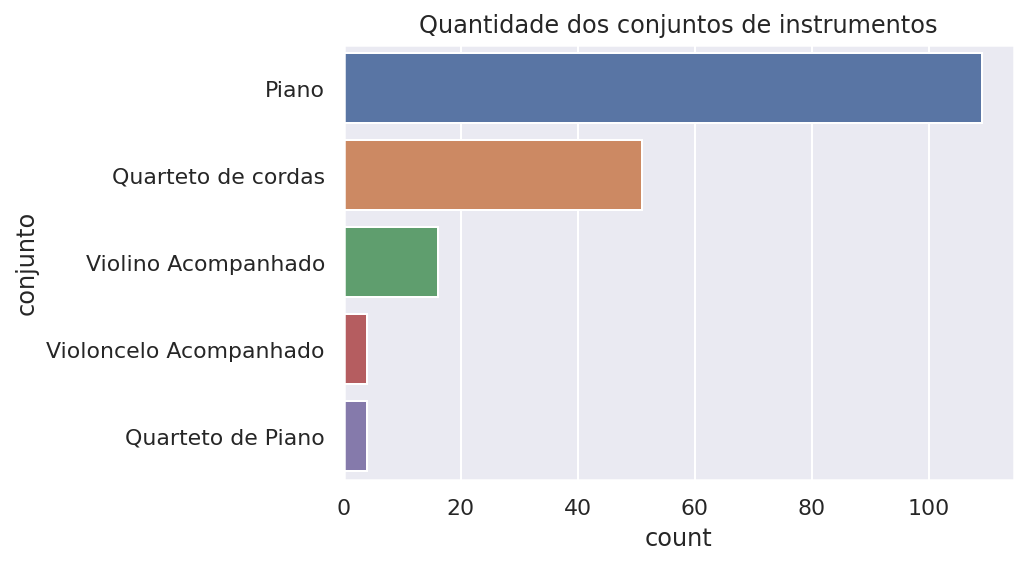

In [19]:
plt.title('Quantidade dos conjuntos de instrumentos')
ax = sns.countplot(y="conjunto", data=just_mid_to_use, order=['Piano', 'Quarteto de cordas', 
                                                              'Violino Acompanhado', 'Violoncelo Acompanhado', 'Quarteto de Piano'])

In [20]:
just_mid_to_use.conjunto.value_counts()

Piano                     109
Quarteto de cordas         51
Violino Acompanhado        16
Violoncelo Acompanhado      4
Quarteto de Piano           4
Name: conjunto, dtype: int64

In [21]:
just_mid_to_use.composer_name.value_counts()

Beethoven    138
Schubert      19
Mozart        12
Dvorak         5
Faure          4
Haydn          3
Ravel          3
Name: composer_name, dtype: int64

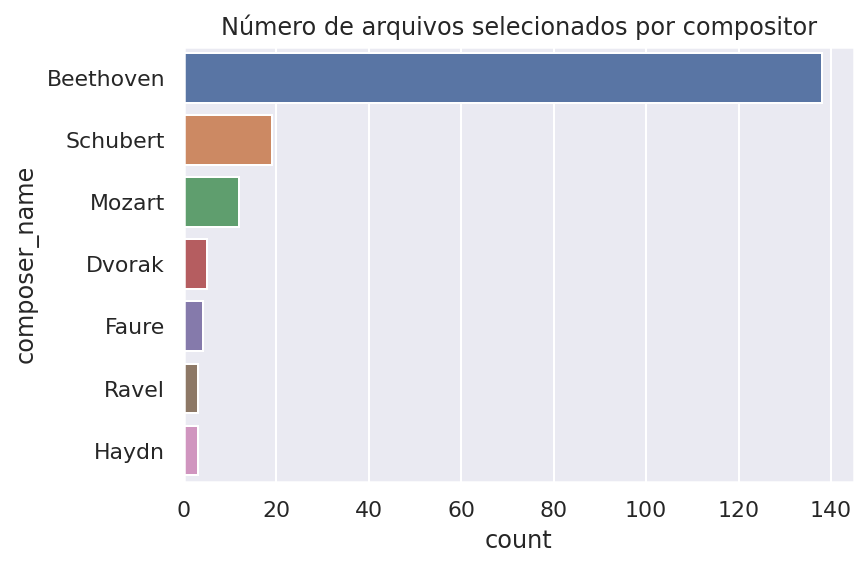

In [22]:
plt.title('Número de arquivos selecionados por compositor')
ax = sns.countplot(y="composer_name", data=just_mid_to_use, order=['Beethoven', 'Schubert', 'Mozart', 
                                                                   'Dvorak', 'Faure', 'Ravel', 'Haydn'])

In [23]:
just_mid_to_use.groupby(['composer_name', 'track_names_str']).size()



composer_name  track_names_str                                           
Beethoven      ['Cello', 'Piano Right', 'Piano Left']                         4
               ['Piano Right', 'Piano Left']                                 90
               ['Violin1', 'Piano Right', 'Piano Left']                       9
               ['Violin1', 'Piano']                                           7
               ['Violin1', 'Violin2', 'Viola', 'Cello']                      28
Dvorak         ['Violin1', 'Violin2', 'Viola', 'Cello']                       3
               ['Violin2', 'Cello', 'Viola', 'Violin1']                       2
Faure          ['Violin1', 'Viola', 'Cello', 'Piano Right', 'Piano Left']     4
Haydn          ['Violin1', 'Violin2', 'Viola', 'Cello']                       3
Mozart         ['Violin1', 'Violin2', 'Viola', 'Cello']                      12
Ravel          ['Violin1', 'Violin2', 'Viola', 'Cello']                       3
Schubert       ['Piano Right', 'Piano Left']  

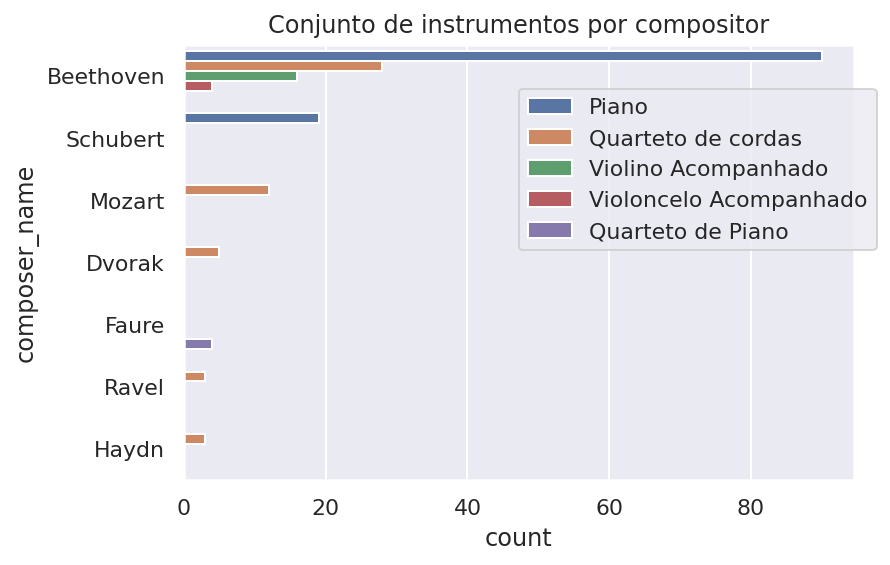

In [24]:

ax = sns.countplot(y="composer_name", hue="conjunto", data=just_mid_to_use, order=['Beethoven', 'Schubert', 'Mozart', 
                                                                                   'Dvorak', 'Faure', 'Ravel', 'Haydn'], hue_order=['Piano', 'Quarteto de cordas', 
                                                                                                                                    'Violino Acompanhado', 'Violoncelo Acompanhado', 'Quarteto de Piano'])
plt.title('Conjunto de instrumentos por compositor') 
plt.legend(bbox_to_anchor=(1.10, 1), loc=1, borderaxespad=2)


In [25]:
def perc_track_not_zero(parts):
  track_use = {}
  sum_all_tracks = 0
  for each_track in parts.keys():
    sum_all_tracks += np.count_nonzero(parts[each_track])
  
  for each_track in parts.keys():
    track_use[each_track] = np.round(np.count_nonzero(parts[each_track]) / sum_all_tracks, 2)

  return track_use


In [26]:

just_mid_to_use['qtd_usage_track'] = just_mid_to_use.parts.apply(perc_track_not_zero)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:

def range_percent(data):
  fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(12,14))
  col = 0
  row = 0
  for index, columns in data:
    ax = sns.boxplot(data=pd.DataFrame(columns.tolist()), palette="Set3", ax=axs[row][col]) #, bw=.2, cut=1, linewidth=1
    ax.title.set_text(f'{index}')
    col +=1
    if col >= 2:
      col = 0
      row += 1

  fig.delaxes(axs[2,1])
  fig.show()
  

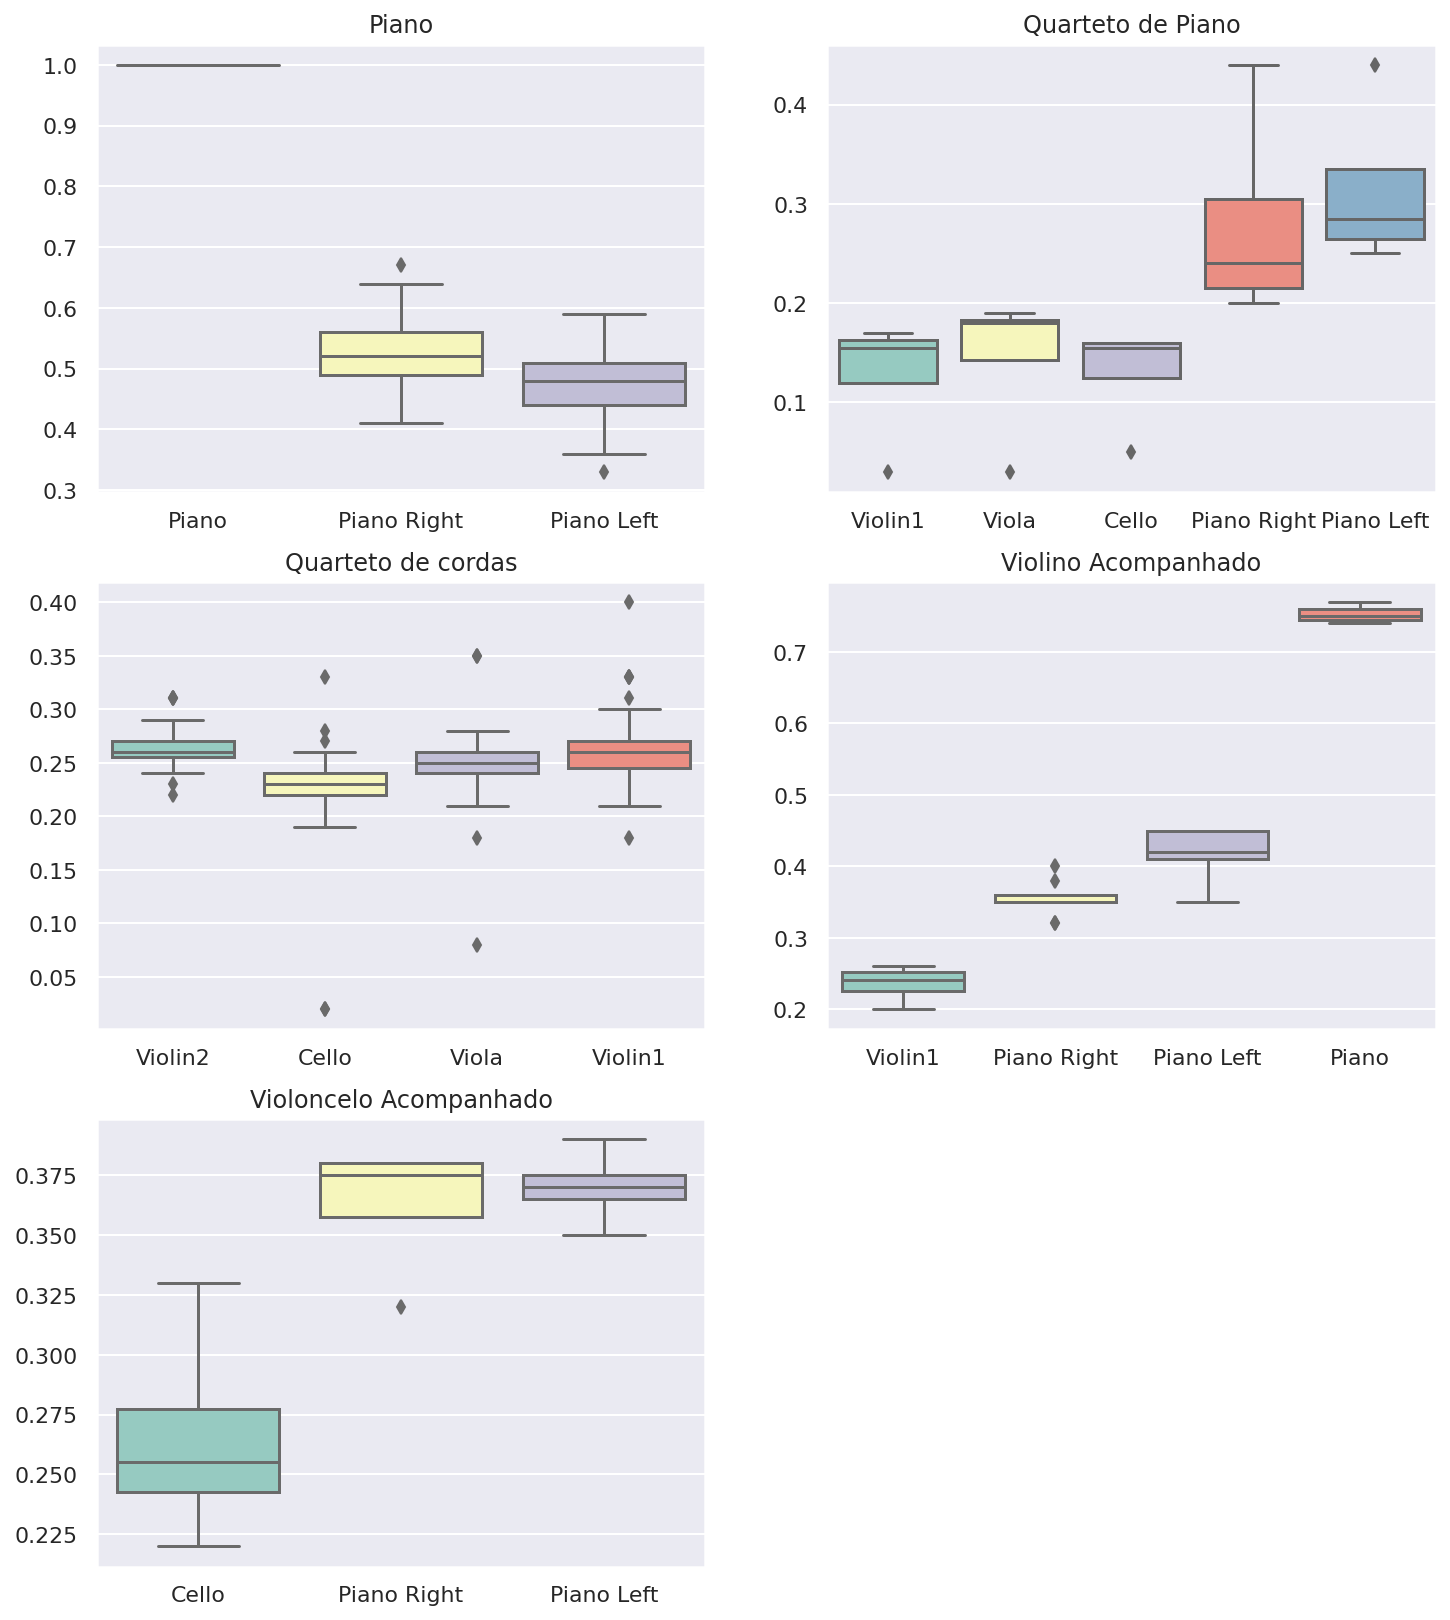

In [28]:
conjunto_range = just_mid_to_use.groupby(['conjunto'])['qtd_usage_track'].pipe(range_percent)
